In [1]:
import pandas as pd  

# Correct file path format  
file_path = r"C:\Users\brend\Desktop\BATADAL_dataset04.csv"  # Add quotes around the path  

# Load the CSV file  
df = pd.read_csv(file_path)  

# Display the first few rows  
print(df.head()) 

      DATETIME   L_T1   L_T2   L_T3   L_T4   L_T5   L_T6   L_T7   F_PU1  \
0  04/07/16 00   2.44   5.24   3.19   4.10   2.86   5.50   4.39   93.63   
1  04/07/16 01   2.66   4.53   3.20   4.18   3.29   5.44   4.53   89.41   
2  04/07/16 02   3.11   3.66   3.66   4.21   3.87   5.15   3.22   89.88   
3  04/07/16 03   3.62   3.04   4.17   4.04   3.56   4.98   2.40   88.10   
4  04/07/16 04   4.08   2.68   4.73   3.20   3.11   5.39   3.46   87.01   

    S_PU1  ...   P_J256   P_J289   P_J415   P_J302   P_J306   P_J307   P_J317  \
0     1.0  ...    70.00    28.22    85.87    21.69    82.72    21.58    71.99   
1     1.0  ...    87.73    24.45    84.87    29.81    86.62    29.81    59.76   
2     1.0  ...    89.29    23.90    87.11    29.85    87.64    29.85    58.50   
3     1.0  ...    91.98    27.10    68.75    31.60    64.25    31.47    72.30   
4     1.0  ...    92.11    26.76    68.74    32.30    64.23    32.17    72.53   

    P_J14   P_J422   ATT_FLAG  
0   39.33    29.64       -999 

In [3]:
print(df[" ATT_FLAG"])

0      -999
1      -999
2      -999
3      -999
4      -999
       ... 
4172   -999
4173   -999
4174   -999
4175   -999
4176   -999
Name:  ATT_FLAG, Length: 4177, dtype: int64


In [5]:
# Assuming you have already made the change from -999 to 0 in the ATT_FLAG column
df[' ATT_FLAG'] = df[' ATT_FLAG'].replace(-999, 0)

# Specify the file path where you want to save the new file
output_file_path = "C:\\Users\\brend\\Desktop\\BATADAL_dataset04_modified.csv"

# Export the modified DataFrame to a new CSV file
df.to_csv(output_file_path, index=False)  # `index=False` avoids writing row indices in the file

print(f"File saved successfully to: {output_file_path}")


File saved successfully to: C:\Users\brend\Desktop\BATADAL_dataset04_modified.csv


Accuracy: 97.29%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1186
           1       0.89      0.57      0.70        68

    accuracy                           0.97      1254
   macro avg       0.93      0.78      0.84      1254
weighted avg       0.97      0.97      0.97      1254

Updated Accuracy: 0.9728867623604466
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1186
           1       0.93      0.54      0.69        68

    accuracy                           0.97      1254
   macro avg       0.95      0.77      0.84      1254
weighted avg       0.97      0.97      0.97      1254



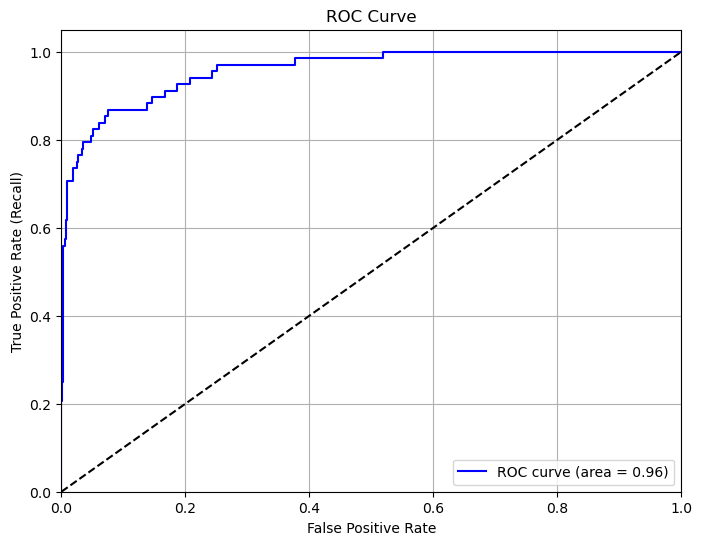

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import joblib

# Load the dataset
df = pd.read_csv("C:\\Users\\brend\\Desktop\\BATADAL_dataset04.csv")

# Replace -999 with 0 in attack flag (label column)
df[" ATT_FLAG"] = df[" ATT_FLAG"].replace(-999, 0)

# Keep only numeric columns
df = df.select_dtypes(include=[float, int])

# Fill missing values with the column mean
df.fillna(df.mean(), inplace=True)

# Split data into features and target
X = df.drop(" ATT_FLAG", axis=1)
y = df[" ATT_FLAG"]

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardise features (zero mean, unit variance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train default Random Forest model
clf_default = RandomForestClassifier(random_state=42)
clf_default.fit(X_train, y_train)
y_pred_default = clf_default.predict(X_test)

# Train tuned Random Forest model with better hyperparameters
clf_tuned = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)
clf_tuned.fit(X_train, y_train)
y_pred_tuned = clf_tuned.predict(X_test)

# Evaluate default model
print("Accuracy:", f"{accuracy_score(y_test, y_pred_default) * 100:.2f}%")
print(classification_report(y_test, y_pred_default))

# Evaluate tuned model
print("Updated Accuracy:", f"{accuracy_score(y_test, y_pred_tuned) * 100:.2f}%")
print(classification_report(y_test, y_pred_tuned))

# Get predicted probabilities for ROC curve (class = 1)
y_pred_prob = clf_tuned.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')  # Random chance line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

joblib.dump(clf_tuned, "C:\\Users\\brend\\Desktop\\app new\\models\\rf_model.pkl")

Accuracy: 96.57%
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1186
           1       0.82      0.47      0.60        68

    accuracy                           0.97      1254
   macro avg       0.90      0.73      0.79      1254
weighted avg       0.96      0.97      0.96      1254

Updated Accuracy: 96.57%
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1186
           1       0.82      0.47      0.60        68

    accuracy                           0.97      1254
   macro avg       0.90      0.73      0.79      1254
weighted avg       0.96      0.97      0.96      1254



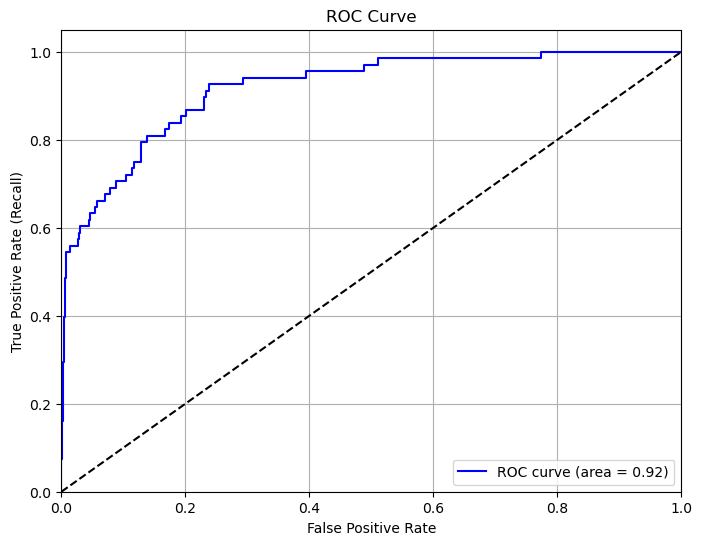

['C:\\Users\\brend\\Desktop\\app new\\models\\lg_model.pkl']

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import joblib

# Load the dataset
file_path = "C:\\Users\\brend\\Desktop\\BATADAL_dataset04.csv"
df = pd.read_csv(file_path)

# Replace -999 values in ATT_FLAG with 0
df[" ATT_FLAG"] = df[" ATT_FLAG"].replace(-999, 0)

# Select only numeric columns
df = df.select_dtypes(include=[float, int])  # Keep only numeric columns

# Fill missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Split the data into features (X) and target (y)
X = df.drop(" ATT_FLAG", axis=1)  # Features
y = df[" ATT_FLAG"]  # Target

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train default Logistic Regression model
clf_default = LogisticRegression(random_state=42)
clf_default.fit(X_train, y_train)
y_pred_default = clf_default.predict(X_test)

# Train tuned Logistic Regression model with better hyperparameters
clf_tuned = LogisticRegression(
    C=1.0,               
    solver='liblinear',  
    max_iter=1000,       
    random_state=42      
)
clf_tuned.fit(X_train, y_train)
y_pred_tuned = clf_tuned.predict(X_test)

# Evaluate default model
print("Accuracy:", f"{accuracy_score(y_test, y_pred_default) * 100:.2f}%")
print(classification_report(y_test, y_pred_default))

# Evaluate tuned model
print("Updated Accuracy:", f"{accuracy_score(y_test, y_pred_tuned) * 100:.2f}%")
print(classification_report(y_test, y_pred_tuned))

# Assuming you have your model's predictions and true labels (y_test, y_pred)
# For example, if you are using a model and the predicted probabilities:
y_pred_prob = clf_tuned.predict_proba(X_test)[:, 1]  # Get probabilities for class 1

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

joblib.dump(clf_tuned, "C:\\Users\\brend\\Desktop\\app new\\models\\lg_model.pkl")

Accuracy: 96.41%
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1186
           1       0.76      0.50      0.60        68

    accuracy                           0.96      1254
   macro avg       0.86      0.75      0.79      1254
weighted avg       0.96      0.96      0.96      1254

Updated Accuracy: 97.21%
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1186
           1       0.87      0.57      0.69        68

    accuracy                           0.97      1254
   macro avg       0.92      0.78      0.84      1254
weighted avg       0.97      0.97      0.97      1254



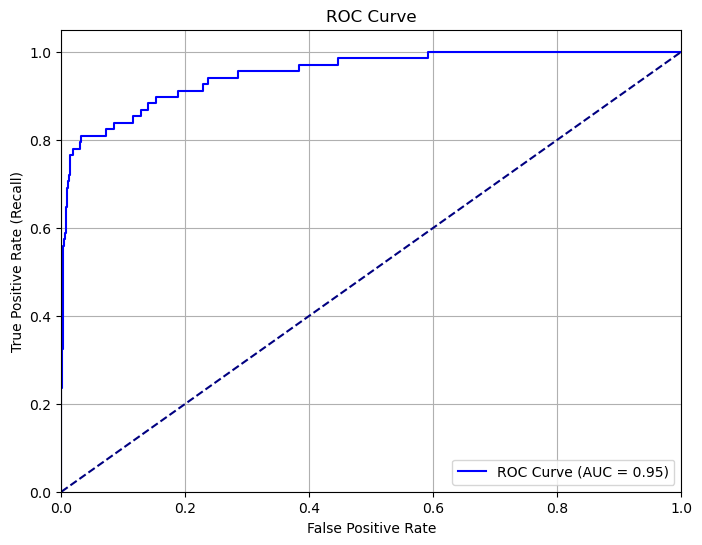

['C:\\Users\\brend\\Desktop\\app new\\models\\gb_model.pkl']

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import joblib

# Load the dataset
file_path = "C:\\Users\\brend\\Desktop\\BATADAL_dataset04.csv"
df = pd.read_csv(file_path)

# Replace -999 values in ATT_FLAG with 0
df[" ATT_FLAG"] = df[" ATT_FLAG"].replace(-999, 0)

# Select only numeric columns
df = df.select_dtypes(include=[float, int])

# Fill missing values with column means
df.fillna(df.mean(), inplace=True)

# Split the data into features and target
X = df.drop(" ATT_FLAG", axis=1)
y = df[" ATT_FLAG"]

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train default Gradient Boosting model
gb_default = GradientBoostingClassifier(random_state=42)
gb_default.fit(X_train, y_train)
y_pred_default = gb_default.predict(X_test)

# Train tuned Gradient Boosting Model with best hyperparameters
gb_tuned = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    min_samples_split=4,
    min_samples_leaf=2,
    subsample=0.8,
    max_features='sqrt',
    random_state=42
)
gb_tuned.fit(X_train, y_train)
y_pred_tuned = gb_tuned.predict(X_test)

# Evaluate default model
print("Accuracy:", f"{accuracy_score(y_test, y_pred_default) * 100:.2f}%")
print(classification_report(y_test, y_pred_default))

# Evaluate tuned model
print("Updated Accuracy:", f"{accuracy_score(y_test, y_pred_tuned) * 100:.2f}%")
print(classification_report(y_test, y_pred_tuned))

# Get predicted probabilities for class 1
y_pred_prob = gb_tuned.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

joblib.dump(clf_default, "C:\\Users\\brend\\Desktop\\app new\\models\\gb_model.pkl")

Accuracy: 97.29%
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1186
           1       0.79      0.68      0.73        68

    accuracy                           0.97      1254
   macro avg       0.89      0.83      0.86      1254
weighted avg       0.97      0.97      0.97      1254

Updated Accuracy: 97.61%
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1186
           1       0.84      0.69      0.76        68

    accuracy                           0.98      1254
   macro avg       0.91      0.84      0.87      1254
weighted avg       0.97      0.98      0.97      1254



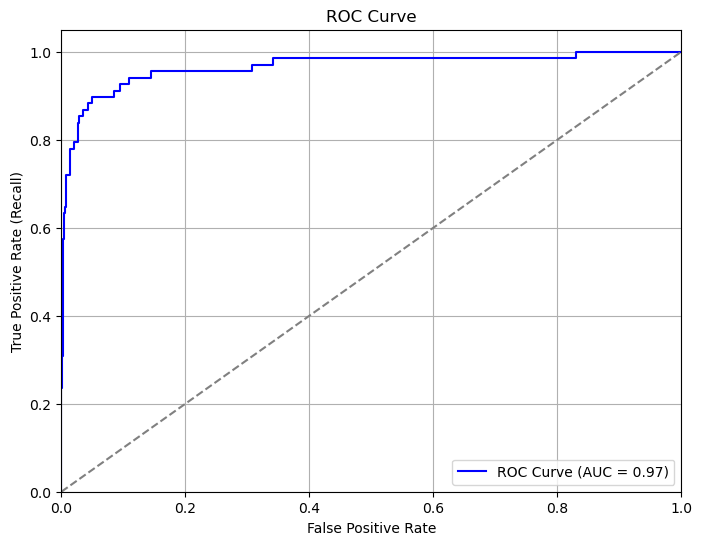

['C:\\Users\\brend\\Desktop\\app new\\models\\ann_model.pkl']

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import joblib

# Load the dataset
file_path = "C:\\Users\\brend\\Desktop\\BATADAL_dataset04.csv"
df = pd.read_csv(file_path)
# Replace -999 values in ATT_FLAG with 0
df[" ATT_FLAG"] = df[" ATT_FLAG"].replace(-999, 0)

# Select only numeric columns
df = df.select_dtypes(include=[float, int])

# Fill missing values with column means
df.fillna(df.mean(), inplace=True)

# Split the data into features and target
X = df.drop(" ATT_FLAG", axis=1)
y = df[" ATT_FLAG"]

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train default ANN model
ann_default = MLPClassifier(random_state=42, max_iter=1000)
ann_default.fit(X_train, y_train)
y_pred_default = ann_default.predict(X_test)

# Train tuned ANN with better hyperparameters
ann_tuned = MLPClassifier(
    hidden_layer_sizes=(64, 32),      
    activation='relu',               
    solver='adam',                   
    alpha=0.0005,                    
    learning_rate='adaptive',        
    max_iter=1500,
    random_state=42
)
ann_tuned.fit(X_train, y_train)
y_pred_tuned = ann_tuned.predict(X_test)

# Evaluate default model
print("Accuracy:", f"{accuracy_score(y_test, y_pred_default) * 100:.2f}%")
print(classification_report(y_test, y_pred_default))

# Evaluate tuned model
print("Updated Accuracy:", f"{accuracy_score(y_test, y_pred_tuned) * 100:.2f}%")
print(classification_report(y_test, y_pred_tuned))

# Get predicted probabilities for class 1 from tuned model
y_pred_prob = ann_tuned.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

joblib.dump(ann_tuned, "C:\\Users\\brend\\Desktop\\app new\\models\\ann_model.pkl")

Accuracy: 96.97%
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1186
           1       0.92      0.49      0.63        68

    accuracy                           0.97      1254
   macro avg       0.94      0.74      0.81      1254
weighted avg       0.97      0.97      0.97      1254

Updated Accuracy: 96.97%
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1186
           1       0.70      0.78      0.74        68

    accuracy                           0.97      1254
   macro avg       0.84      0.88      0.86      1254
weighted avg       0.97      0.97      0.97      1254



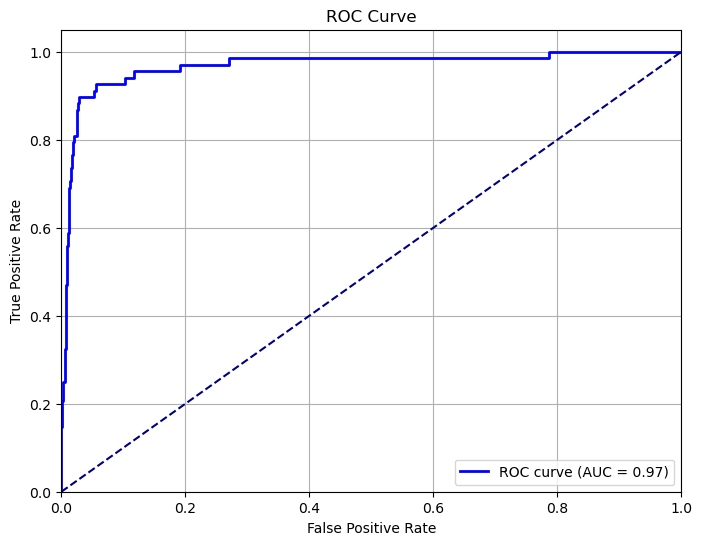

['C:\\Users\\brend\\Desktop\\app new\\models\\svm_model.pkl']

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import joblib

# Load the dataset
file_path = "C:\\Users\\brend\\Desktop\\BATADAL_dataset04.csv"
df = pd.read_csv(file_path)

# Replace -999 in ATT_FLAG with 0
df[" ATT_FLAG"] = df[" ATT_FLAG"].replace(-999, 0)

# Keep only numeric columns
df = df.select_dtypes(include=[float, int])

# Fill missing values with column mean
df.fillna(df.mean(), inplace=True)

# Split into features and target
X = df.drop(" ATT_FLAG", axis=1)
y = df[" ATT_FLAG"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train default SVM model 
clf_default = SVC(probability=True, random_state=42)
clf_default.fit(X_train, y_train)
y_pred_default = clf_default.predict(X_test)

# Train tuned SVM with better hyperparameters
SVC_tuned = SVC(
    kernel='rbf',                       
    C=100,                         
    gamma=0.01,                     
    probability=True,
    class_weight='balanced',
    random_state=42
)
SVC_tuned.fit(X_train, y_train)
y_pred_tuned = SVC_tuned.predict(X_test)

# Evaluate default model
print("Accuracy:", f"{accuracy_score(y_test, y_pred_default) * 100:.2f}%")
print(classification_report(y_test, y_pred_default))

# Evaluate tuned model
print("Updated Accuracy:", f"{accuracy_score(y_test, y_pred_tuned) * 100:.2f}%")
print(classification_report(y_test, y_pred_tuned))

# ROC curve for tuned model
y_pred_prob = SVC_tuned.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

joblib.dump(SVC_tuned, "C:\\Users\\brend\\Desktop\\app new\\models\\svm_model.pkl")